In [106]:
import pandas as pd
import numpy as np
import torchvision
from torchvision import transforms
import cv2
import os
import torch
from torch import nn,optim
import matplotlib.pyplot as plt

In [107]:
filename=os.listdir(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\burj_khalifa")
filename[0]

'0005487c0b.jpg'

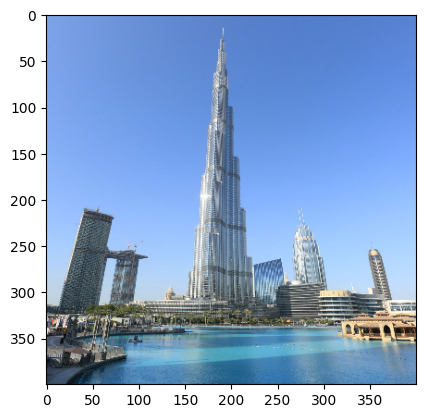

In [108]:
image=cv2.imread(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\burj_khalifa\\0005487c0b.jpg")
image=cv2.resize(image,dsize=(400,400))
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [109]:
files=os.listdir(r"C:\Users\S\Desktop\wonder of world data\Wonders_world")
files

['burj_khalifa',
 'chichen_itza',
 'christ_the_reedemer',
 'eiffel_tower',
 'great_wall_of_china',
 'machu_pichu',
 'pyramids_of_giza',
 'roman_colosseum',
 'statue_of_liberty',
 'stonehenge',
 'taj_mahal',
 'venezuela_angel_falls']

In [110]:
import glob
from concurrent.futures import ThreadPoolExecutor,as_completed
from tqdm import tqdm
def process_image(filename):
    image=cv2.imread(filename)
    try:
        if image is not None:
            image=cv2.resize(image,dsize=(100,100))
            image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            return image
        else:
            print(f"Image is not present at this {filename}.")
            
    except cv2.error as e:
        print(f"cv2 error {e}")
        return None
    
    except Exception as e:
        print(f"Exception error {e}")
        return None
    
def load_image(path):
    images=[]
    file=os.path.join(path,"*jpg")
    filenames=glob.glob(file)
    
    with ThreadPoolExecutor(max_workers=8) as executor:
        future_to_filename = {executor.submit(process_image, filename): filename for filename in filenames[0: int(1*len(filenames))]}
        for future in tqdm(as_completed(future_to_filename), total=len(filenames)):
            result = future.result()
            if result is not None:
                images.append(result)
        
    return np.array(images)
 

In [111]:
burj_khalifa=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\burj_khalifa")
chichen_itza=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\\chichen_itza")
christ_the_reedemer=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\\christ_the_reedemer")
eiffel_tower=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\\eiffel_tower")
great_wall_of_china=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\\great_wall_of_china")
machu_pichu=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\\machu_pichu")
pyramids_of_giza=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\\pyramids_of_giza")
roman_colosseum=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\\roman_colosseum")
statue_of_liberty=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\statue_of_liberty")
stonehenge=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\stonehenge")
taj_mahal=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\\taj_mahal")
venezuela_angel_falls=load_image(r"C:\Users\S\Desktop\wonder of world data\Wonders_world\\venezuela_angel_falls")

100%|██████████| 251/251 [00:00<00:00, 843.13it/s] 


In [112]:
# np.save("burj_khalifa.npy",burj_khalifa)
# test=np.load("burj_khalifa.npy")
# test.shape

In [113]:
burj_train=burj_khalifa[:int(0.8*len(burj_khalifa))]
y0_train=np.array([0]*len(burj_train))
burj_test=burj_khalifa[:(len(burj_khalifa)-int(0.8*len(burj_khalifa)))]
y0_test=np.array([0]*len(burj_test))
burj_train.shape,burj_test.shape,y0_train.shape,y0_test.shape

((312, 100, 100, 3), (78, 100, 100, 3), (312,), (78,))

In [114]:
eiffel_train=eiffel_tower[:int(0.8*len(eiffel_tower))]
y1_train=np.array([0]*len(eiffel_train))
eiffel_test=eiffel_tower[:(len(eiffel_tower)-int(0.8*len(eiffel_tower)))]
y1_test=np.array([0]*len(eiffel_test))
eiffel_train.shape,eiffel_test.shape,y1_train.shape,y1_test.shape

((312, 100, 100, 3), (79, 100, 100, 3), (312,), (79,))

In [115]:
china_train=great_wall_of_china[:int(0.8*len(great_wall_of_china))]
y2_train=np.array([0]*len(china_train))
china_test=great_wall_of_china[:(len(great_wall_of_china)-int(0.8*len(great_wall_of_china)))]
y2_test=np.array([0]*len(china_test))
china_train.shape,china_test.shape,y2_train.shape,y2_test.shape

((313, 100, 100, 3), (79, 100, 100, 3), (313,), (79,))

In [116]:
machu_train=machu_pichu[:int(0.8*len(machu_pichu))]
y3_train=np.array([0]*len(machu_train))
machu_test=machu_pichu[:(len(machu_pichu)-int(0.8*len(machu_pichu)))]
y3_test=np.array([0]*len(machu_test))
machu_train.shape,machu_test.shape,y3_train.shape,y3_test.shape

((314, 100, 100, 3), (79, 100, 100, 3), (314,), (79,))

In [117]:
pyramid_train=pyramids_of_giza[:int(0.8*len(pyramids_of_giza))]
y4_train=np.array([0]*len(pyramid_train))
pyramid_test=pyramids_of_giza[:(len(pyramids_of_giza)-int(0.8*len(pyramids_of_giza)))]
y4_test=np.array([0]*len(pyramid_test))
pyramid_train.shape,pyramid_test.shape,y4_train.shape,y4_test.shape

((297, 100, 100, 3), (75, 100, 100, 3), (297,), (75,))

In [118]:
roman_train=roman_colosseum[:int(0.8*len(roman_colosseum))]
y5_train=np.array([0]*len(roman_train))
roman_test=roman_colosseum[:(len(roman_colosseum)-int(0.8*len(roman_colosseum)))]
y5_test=np.array([0]*len(roman_test))
roman_train.shape,roman_test.shape,y5_train.shape,y5_test.shape

((315, 100, 100, 3), (79, 100, 100, 3), (315,), (79,))

In [119]:
x1_train=np.append(burj_train,eiffel_train,axis=0)
x1_test=np.append(burj_test,eiffel_test,axis=0)
y1_train=np.append(y0_train,y1_train,axis=0)
y1_test=np.append(y0_test,y1_test,axis=0)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((624, 100, 100, 3), (157, 100, 100, 3), (624,), (157,))

In [120]:
x2_train=np.append(china_train,machu_train,axis=0)
x2_test=np.append(china_test,machu_test,axis=0)
y2_train=np.append(y2_train,y3_train,axis=0)
y2_test=np.append(y2_test,y3_test,axis=0)
x2_train.shape,x2_test.shape,y2_train.shape,y2_test.shape

((627, 100, 100, 3), (158, 100, 100, 3), (627,), (158,))

In [121]:
x3_train=np.append(pyramid_train,roman_train,axis=0)
x3_test=np.append(pyramid_test,roman_test,axis=0)
y3_train=np.append(y4_train,y5_train,axis=0)
y3_test=np.append(y4_test,y5_test,axis=0)
x3_train.shape,x3_test.shape,y3_train.shape,y3_test.shape

((612, 100, 100, 3), (154, 100, 100, 3), (612,), (154,))

In [122]:
x12_train=np.append(x1_train,x2_train,axis=0)
x12_test=np.append(x1_test,x2_test,axis=0)
y12_train=np.append(y1_train,y2_train,axis=0)
y12_test=np.append(y1_test,y2_test,axis=0)
x12_train.shape,x12_test.shape,y12_train.shape,y12_test.shape

((1251, 100, 100, 3), (315, 100, 100, 3), (1251,), (315,))

In [123]:
x_combine_train=np.append(x12_train,x3_train,axis=0)
x_combine_test=np.append(x12_test,x3_test,axis=0)
y_combine_train=np.append(y12_train,y3_train,axis=0)
y_combine_test=np.append(y12_test,y3_test,axis=0)
x_combine_train.shape,x_combine_test.shape,y_combine_train.shape,y_combine_test.shape

((1863, 100, 100, 3), (469, 100, 100, 3), (1863,), (469,))

#### Final x,y data

In [124]:
x=np.append(x_combine_train,x_combine_test,axis=0)
y=np.append(y_combine_train,y_combine_test,axis=0)
x.shape,y.shape

((2332, 100, 100, 3), (2332,))

In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1865, 100, 100, 3), (1865,), (467, 100, 100, 3), (467,))

In [126]:
train_data_transform=transforms.Compose(
    [
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(0.2),
    transforms.RandomGrayscale(0.2),
    transforms.RandomRotation(20),
    transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5]),
    ]
)

test_data_transforms=transforms.Compose(
    [
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5]),
    ]
)

In [127]:
from torch.utils.data import Dataset,DataLoader
class data(Dataset):
    def __init__(self,images,label,transforms):
        super().__init__()
        self.images=images
        self.labels=label
        self.transforms=transforms
        
    def __getitem__(self,index):
        images=self.images[index]
        labels=self.labels[index]
        if self.transforms:
            images=self.transforms(images)
        return images,labels
    
    def __len__(self):
        return self.images.shape[0]

In [128]:
data(x_train,y_train,train_data_transform)

In [129]:
train_data=data(x_train,y_train,train_data_transform)
test_data=data(x_test,y_test,test_data_transforms)
len(train_data),len(test_data)

(1865, 467)

In [130]:
train_data_loader=DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True,
    drop_last=False,
)

test_data_loader=DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=True,
    drop_last=True,
)

In [131]:
# for x,y in test_data_loader:
#     print(x.shape,y.shape)

In [132]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(
            in_channels=3,
            out_channels=8,
            kernel_size=(3,3),
            stride=(1,1),
            padding=(1,1),
        )
        self.bn1=nn.BatchNorm2d(num_features=8)
        self.maxpool=nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        
        self.conv2=nn.Conv2d(
            in_channels=8,
            out_channels=16,
            kernel_size=(3,3),
            stride=(1,1),
            padding=(1,1),
        )
        self.bn2=nn.BatchNorm2d(num_features=16)
        
        self.fc1=nn.Linear(
            in_features=16*25*25,
            out_features=32,
        )
        
        self.fc2=nn.Linear(
            in_features=32,
            out_features=16,
        )
        
        self.fc4=nn.Linear(
            in_features=16,
            out_features=6,
        )
        
    def forward(self,x):
        
        x=nn.functional.relu(self.bn1(self.conv1(x)))
        x=self.maxpool(x)
        x=nn.functional.relu(self.bn2(self.conv2(x)))
        x=self.maxpool(x)
        
        x=x.reshape(x.shape[0],-1)
        
        x=nn.functional.relu(self.fc1(x))
        x=nn.functional.relu(self.fc2(x))
        x=self.fc4(x)
        return x
        

In [133]:
model=CNN()
model

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=10000, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=6, bias=True)
)

In [134]:
import torchinfo
from torchinfo import summary

In [135]:
test=torch.randn(1,3,100,100)
pred=model(test)
pred,
torch.argmax(pred,dim=1)

tensor([3])

In [136]:
summary(model,input_size=(32,3,100,100))

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [32, 6]                   --
├─Conv2d: 1-1                            [32, 8, 100, 100]         224
├─BatchNorm2d: 1-2                       [32, 8, 100, 100]         16
├─MaxPool2d: 1-3                         [32, 8, 50, 50]           --
├─Conv2d: 1-4                            [32, 16, 50, 50]          1,168
├─BatchNorm2d: 1-5                       [32, 16, 50, 50]          32
├─MaxPool2d: 1-6                         [32, 16, 25, 25]          --
├─Linear: 1-7                            [32, 32]                  320,032
├─Linear: 1-8                            [32, 16]                  528
├─Linear: 1-9                            [32, 6]                   102
Total params: 322,102
Trainable params: 322,102
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 175.38
Input size (MB): 3.84
Forward/backward pass size (MB): 61.45
Params size (MB): 1.29
Estimated Total 

In [137]:
# for parametrs in model.parameters():
#     print(parametrs)

In [138]:
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [139]:
import warnings
warnings.filterwarnings("ignore")

In [140]:
from statistics import mean
from tqdm import tqdm
import torch

device = torch.device("cpu")   
epochs = 10
avg_loss = []

model.to(device)
for i in range(epochs):
    losses = []
    total, correct = 0, 0
    for x, y in tqdm(train_data_loader, total=len(train_data_loader)):
        x = x.float().to(device)   
        y=y.long().squeeze().to(device)     
        
        optimizer.zero_grad()
        y_pred = model(x)
        
        loss = loss_fn(y_pred, y)   
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
        pred = torch.argmax(y_pred, dim=1)
        correct += (pred == y).sum().item()
        total += y.size(0)
    
    avg_loss_val = mean(losses)
    accuracy = (correct / total) * 100
    avg_loss.append(avg_loss_val)
    
    print(f"Epoch [{i+1}/{epochs}] Loss: {avg_loss_val:.4f} | Accuracy: {accuracy:.2f}%")


100%|██████████| 59/59 [00:07<00:00,  8.07it/s]


Epoch [1/10] Loss: 0.0495 | Accuracy: 98.28%


100%|██████████| 59/59 [00:06<00:00,  8.64it/s]


Epoch [2/10] Loss: 0.0000 | Accuracy: 100.00%


100%|██████████| 59/59 [00:08<00:00,  6.56it/s]


Epoch [3/10] Loss: 0.0000 | Accuracy: 100.00%


100%|██████████| 59/59 [00:08<00:00,  6.71it/s]


Epoch [4/10] Loss: 0.0000 | Accuracy: 100.00%


100%|██████████| 59/59 [00:10<00:00,  5.67it/s]


Epoch [5/10] Loss: 0.0000 | Accuracy: 100.00%


100%|██████████| 59/59 [00:10<00:00,  5.57it/s]


Epoch [6/10] Loss: 0.0000 | Accuracy: 100.00%


100%|██████████| 59/59 [00:10<00:00,  5.85it/s]


Epoch [7/10] Loss: 0.0000 | Accuracy: 100.00%


100%|██████████| 59/59 [00:08<00:00,  6.93it/s]


Epoch [8/10] Loss: 0.0000 | Accuracy: 100.00%


100%|██████████| 59/59 [00:07<00:00,  7.47it/s]


Epoch [9/10] Loss: 0.0000 | Accuracy: 100.00%


100%|██████████| 59/59 [00:12<00:00,  4.87it/s]

Epoch [10/10] Loss: 0.0000 | Accuracy: 100.00%


In [142]:
val_loss = 0.0
model.eval()
with torch.no_grad():
    for x, y in test_data_loader:
        x = x.float().to(device)
        y = y.long().to(device)

        y_pred = model(x)
        loss = loss_fn(y_pred, y)   # same loss function as training
        val_loss += loss.item() * y.size(0)

val_loss /= total
print(f"Validation Loss: {val_loss:.4f} | Accuracy: {accuracy:.2f}%")


Validation Loss: 0.0000 | Accuracy: 100.00%


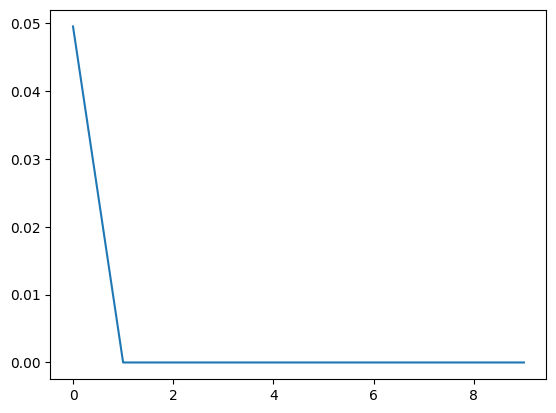

In [144]:
import matplotlib.pyplot as plt 
plt.plot(range(epochs),avg_loss)